This notebook creates a static map that shows the percentage of people who are African American in Washington D. C. census blocks overlaid with the Washington D.C. wards in 2022. The data is from Open Data DC in 2022 (https://opendata.dc.gov).

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

In [2]:
wards = gpd.read_file('data/Wards_from_2022.geojson', driver='GeoJSON')
wards.shape

(8, 322)

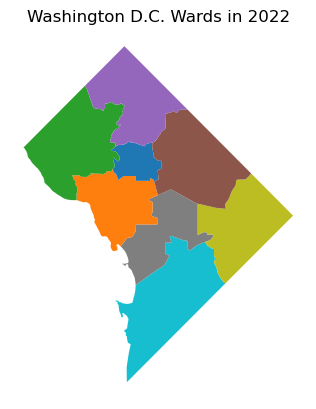

In [3]:
wards.plot(column='WARD_ID')
plt.axis('off')
plt.title('Washington D.C. Wards in 2022')
plt.show()

In [21]:
census = gpd.read_file('data/Census_Blocks_in_2020.geojson', driver='GeoJSON')
census.shape

(6012, 319)

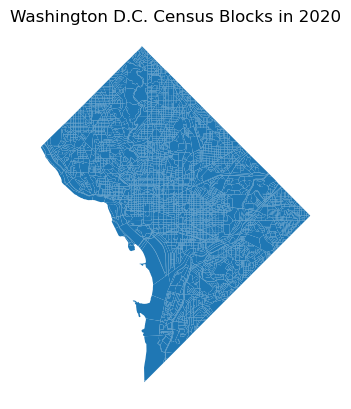

In [22]:
census.plot()
plt.axis('off')
plt.title('Washington D.C. Census Blocks in 2020')
plt.show()

In [23]:
print(f'Ward crs: {wards.crs}')
print(f'Census crs: {census.crs}')

Ward crs: epsg:3857
Census crs: epsg:4326


In [24]:
# reproject the data to match up better with the map tiles we'll use
wards = wards.to_crs(epsg=3857)
census = census.to_crs(epsg=3857)

### Create a map showing the percentage of  African American alone individuals in each census block overlaid with the wards

In [25]:
census['perc_aa'] = (census['P0010004']/census['P0010001'])*100

In [26]:
min(census['P0010001']), max(census['P0010001'])

(0, 3060)

In [27]:
# some census tracts don't have population data, so let's remove those
census = census[census['perc_aa'].notnull()]

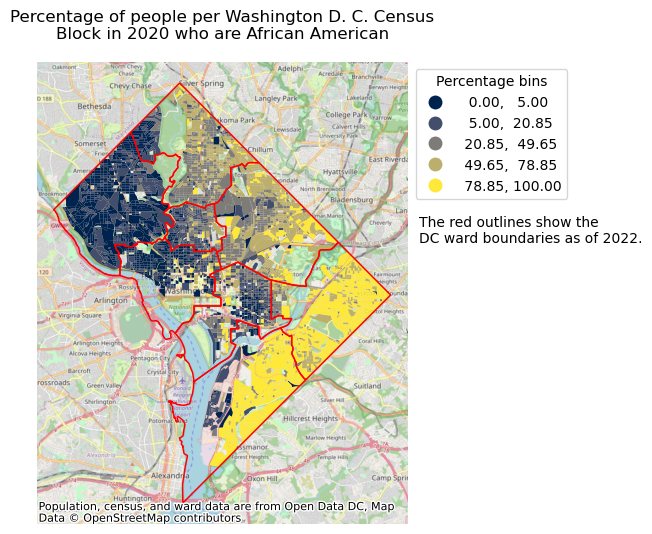

In [29]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
census.plot(ax=ax, column='perc_aa', scheme='quantiles', cmap='cividis', legend=True, \
            legend_kwds={'title': 'Percentage bins'})
ax.set_title('Percentage of people per Washington D. C. Census\nBlock in 2020 who are African American')
ax.get_legend().set_bbox_to_anchor((1.45, 1))

wards.plot(ax=ax, column='WARD_ID', edgecolor='red', facecolor='none')

attr = "Population, census, and ward data are from Open Data DC, Map Data © OpenStreetMap contributors"

ctx.add_basemap(ax, attribution=attr, source=ctx.providers.OpenStreetMap.Mapnik)

plt.text(-8559500, 4710000, 'The red outlines show the\nDC ward boundaries as of 2022.')

plt.axis('off')

plt.savefig('docs/dc_aa_pop_map.png')